In [4]:
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import seaborn as sns
def project_vector(vector, surface):
    """Project an N-dimensional vector onto an N-1 dimensional surface.

    Args:
        vector (numpy array): N-dimensional vector to be projected.
        surface (numpy array): N-dimensional vector defining the surface.

    Returns:
        numpy array: N-dimensional projected vector.
    """
    # Calculate the projection matrix P = I - (aa^T)/(a^Ta)
    a = surface.reshape(-1, 1)
    P = np.eye(len(vector)) - np.dot(a, a.T) / np.dot(a.T, a)

    # Project the vector onto the surface using the projection matrix
    projected_vector = np.dot(P, vector)
    return projected_vector

def project_point_to_surface(point, surface):
    """Project a point onto an N-1 dimensional surface defined by a vector.

    Args:
        point (numpy array): N-dimensional point to be projected.
        surface (numpy array): N-dimensional vector defining the surface.

    Returns:
        numpy array: N-dimensional point on the surface nearest to the input point.
    """
    # Calculate the projection matrix P = I - (aa^T)/(a^Ta)
    a = surface.reshape(-1, 1)
    P = np.eye(len(point)) - np.dot(a, a.T) / np.dot(a.T, a)

    # Project the point onto the surface using the projection matrix
    projected_point = np.dot(P, point)

    return projected_point
project_point_to_surface(np.array([0, 2]), np.array([1, 1]))

array([-1.,  1.])

In [5]:
# H = np.random.normal(size=(2, 2), scale=10)
# m = 8
# while True:
#     X = np.random.normal(size=(m, 10), scale=1)
#     target_y = np.random.normal(size=(m, 1), scale=10)
#     H = np.zeros((m, m))
#
#     for i in range(m):
#         for j in range(m):
#             H[i, j] = target_y[i]*target_y[j]* X[i].T@X[i]
#     # print(H)
#     try:
#         np.linalg.cholesky(H)
#         break
#     except:
#         pass

In [6]:
# target_y = np.random.choice([-1, 1], size=m)
# target_y.shape

<Axes: xlabel='x', ylabel='y'>

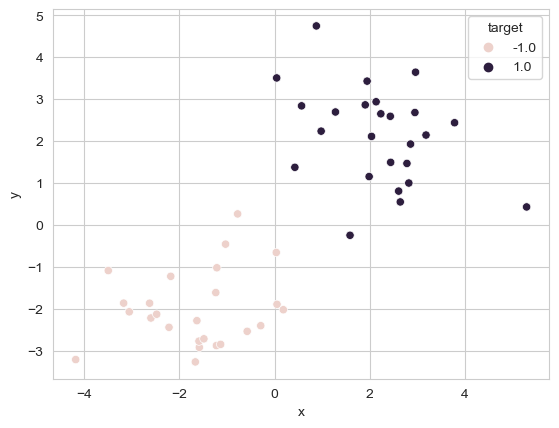

In [55]:
m = 50
n = 2
X_1 = np.random.normal(size=(m//2, n), scale=1) - 2
X_2 = np.random.normal(size=(m//2, n), scale=1) + 2
y_1 = -np.ones(shape=(m//2, ))
y_2 = np.ones(shape=(m//2, ))
X = np.vstack((X_1, X_2))
target_y = np.hstack((y_1, y_2))

H = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        H[i, j] = target_y[i]*target_y[j]* X[i].T@X[i]
X.shape
X

df = pd.DataFrame(np.hstack((X, target_y.reshape(m, 1))), columns=['x', 'y', 'target'])
df
sns.scatterplot(data=df, x='x', y='y', hue='target')
# target_y

In [56]:

alph = np.array([0, 0])

def func(x_i, y_i):
    alph = np.array((x_i, y_i))
    # print(alph.shape)
    return mat_func(alph)

def mat_func(alph):
    return -1/2*alph.T@H@alph + np.sum(alph)

def Zfunc(X, Y, f = func):
    Z = np.zeros_like(X)
    for i in range(100):
        for j in range(100):
            Z[i, j] = f(X[i, j], Y[i, j])
    return Z

# x = np.linspace(-4, 4, 100)
# y = np.linspace(-4, 4, 100)
#
# X, Y = np.meshgrid(x, y)
#
# Z = Zfunc(X, Y, f=func)
#
# # Создание объекта рисунка и трехмерной оси
# fig = plt.figure()
# ax = plt.axes(projection='3d')
#
# # Построение поверхности
# ax.scatter(1, 1, func(1, 1)+1, c='red', marker='.', s=500)
# ax.plot_surface(X, Y, Z)
#
# # Настройка меток осей и заголовка
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# ax.set_title('Saddle Surface')
# ax.set_xlim((-2, 4))
# ax.set_ylim((-2, 4))
#
#
# # Отображение графика
# plt.show()

In [57]:
def optimize(start: np.ndarray, H: np.ndarray, y: np.ndarray, num_iters = 10, lr = 0.001):
    alph = start.reshape((1, -1)).T
    print(alph.shape)
    momentum = np.zeros_like(alph)

    alph = project_point_to_surface(alph.reshape(-1, ), y).reshape(-1, 1)

    for iter in range(num_iters):

        grad = -1/2*H@alph - (1/2*alph.T@H).T + np.ones_like(alph)
        grad = np.clip(grad, -10, 10)
        # print(grad)
        # print(np.linalg.norm(grad))
        # print(alph, '\n---\n')
        step = lr*(grad*(1/(iter + 1)) - 100*np.clip(-np.inf, 0, np.sign(alph))) + momentum

        step = project_vector(step, y)

        alph += step
        # momentum = lr*grad/2

        # alph = np.clip(alph, 0, np.inf)
        # print(alph.reshape(-1, ).shape)

        print('before correction y@aplh = ', y@alph)
        alph = project_point_to_surface(alph.reshape(-1, ), y).reshape(-1, 1)
        print('after  correction y@aplh = ', y@alph)
        print('f(alph) = ', mat_func(alph))
        print('sum(alph<0) = ', np.sum(np.abs(np.clip(alph, -np.inf, 0))))
        print('norm(alph) ', np.linalg.norm(alph))
        print('norm(step) ', np.linalg.norm(step))
        print('-----\n')
        # print(alph.shape)


    return alph

start = np.random.uniform(-100, 100, size=m)

start, target_y

(array([-26.96806715,  96.47816259,  85.6439782 , -54.46450724,
         77.06187489, -74.12261268,   6.87435641,  37.22376812,
        -55.91124279, -83.49624305, -71.22486658,  91.94735565,
         52.65161834,  20.80671129,  40.39591692,  51.68737164,
         40.17811965, -33.24704017,   8.43975573, -90.98558123,
         13.88161253,  39.44950593, -66.55411872,  10.75369089,
         32.11148864,  67.20812371, -93.99891708, -45.47866804,
        -66.87923813,  50.83066035, -33.27848116,  86.55830982,
         56.2128191 , -72.58248749, -41.70491256, -93.57501026,
          3.74072917, -32.02542576, -71.47373487,  33.14923172,
         11.13131795,  52.81258281,  27.70112478,  62.43114991,
        -62.34303525, -97.50328005,  50.65057986,  41.24439403,
         68.70783674, -31.43891776]),
 array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 

In [58]:
alph = optimize(start, H, target_y, num_iters=10000, lr=0.01)

(50, 1)
before correction y@aplh =  [-7.10542736e-14]
after  correction y@aplh =  [7.10542736e-14]
f(alph) =  [[39.70775936]]
sum(alph<0) =  1261.7255326329498
norm(alph)  408.4481685867482
norm(step)  4.5628938186199335
-----

before correction y@aplh =  [-1.42108547e-14]
after  correction y@aplh =  [0.]
f(alph) =  [[60.70775936]]
sum(alph<0) =  1240.9055326329499
norm(alph)  405.373007681324
norm(step)  4.5628938186199335
-----

before correction y@aplh =  [-4.26325641e-14]
after  correction y@aplh =  [-9.9475983e-14]
f(alph) =  [[81.70775936]]
sum(alph<0) =  1220.0855326329497
norm(alph)  402.32609198427195
norm(step)  4.5628938186199335
-----

before correction y@aplh =  [-1.56319402e-13]
after  correction y@aplh =  [1.42108547e-14]
f(alph) =  [[102.70775936]]
sum(alph<0) =  1199.2655326329498
norm(alph)  399.3080680703446
norm(step)  4.5628938186199335
-----

before correction y@aplh =  [-8.52651283e-14]
after  correction y@aplh =  [1.27897692e-13]
f(alph) =  [[123.70775936]]
sum(

In [59]:
w = np.sum(X*target_y.reshape(-1, 1) * alph, axis=0).reshape(-1, 1)
b = np.sum(target_y.reshape(-1, 1) - X@w)/m

In [60]:
X@w + b

array([[-13333.89482272],
       [ -9413.57131559],
       [-13525.83766268],
       [ -2493.94056705],
       [-13890.66907896],
       [-14505.50414341],
       [ -7190.10591208],
       [-14391.67535453],
       [-12958.55817801],
       [-15092.27059452],
       [-10527.94345819],
       [ -8231.79042413],
       [-13798.13215104],
       [ -5882.98495119],
       [-21598.70975322],
       [-12185.57795566],
       [-13943.95551938],
       [-11775.73091961],
       [-12512.76167063],
       [ -5845.64494353],
       [ -8840.25680545],
       [ -2616.49284817],
       [-11852.4323009 ],
       [-15308.47150609],
       [ -5155.99872298],
       [ 16463.69816545],
       [  7852.62666334],
       [ 10980.61854868],
       [  9936.82943538],
       [ 15447.57332738],
       [  2946.58529871],
       [ 13947.75299452],
       [  8712.1471141 ],
       [ 17327.95017137],
       [  8552.41355917],
       [  7846.60703934],
       [ 14276.0035058 ],
       [ 12434.77164016],
       [  98

In [88]:
from time import sleep


def find_duplicate(nums):
    n = len(nums) - 1
    # Используем алгоритм "Черепаха и заяц"
    # для нахождения повторяющегося элемента
    # в массиве nums.
    tortoise = nums[0]
    hare = nums[0]

    while True:
        tortoise = nums[tortoise]
        hare = nums[nums[hare]]
        print(tortoise, hare)
        if tortoise == hare:
            break
        # sleep(1)


    ptr1 = nums[0]
    ptr2 = tortoise
    print('----')
    while ptr1 != ptr2:
        print(ptr1, ptr2)
        ptr1 = nums[ptr1]
        ptr2 = nums[ptr2]

    # Возвращаем повторяющийся элемент
    return ptr1

In [104]:
find_duplicate(list(range(1, 10)) + [4])
# 1    1 - t
# a[t] 2 - h


2 3
3 5
4 7
5 9
6 5
7 7
----
1 7
2 8
3 9


4

In [106]:
l = [5, 4, 6, 3, 4, 5, 6, 8, 10, 2]

In [117]:
min_elem = l[0]
max_profit = 1.
min_i = -1
used_idxs = {
        'min': -1,
        'max': -1
    }
for i, elem in enumerate(l):
    if min_elem > elem:
        min_elem = elem
        min_i = i

    if max_profit < elem/min_elem:
        max_profit = elem/min_elem
        used_idxs['min'] = min_i
        used_idxs['max'] = i

print(used_idxs, max_profit)
print(l[used_idxs['min']:used_idxs['max']+1])


{'min': 3, 'max': 8} 3.3333333333333335
[3, 4, 5, 6, 8, 10]
